# Лабораторная работа №1. Объяснимый ИИ

***Выполнила: Печкина Кристина, 932101гр.***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, precision_score, balanced_accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras import layers
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

## Задание №1. Регрессор

### Работа с данными

In [ ]:
from google.colab import drive

# Подключаем Google Диск
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Путь к файлу на Google Диске
file_path = '/content/drive/My Drive/ColabNotebooks/ML/Laba5/DS_2019_public.csv'

# Чтение CSV файла
df = pd.read_csv(file_path, encoding="windows-1251")
df.head()

<ipython-input-79-9467a1982631>:5: DtypeWarning: Columns (30,56,96,114) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding="windows-1251")


,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
0,5,10,26,16.793,17,181.998,620.979,621,368,38606,...,-2,30110,2,120.893,121,4,0,1,1,1310.220
1,1,1,1,48.901,49,184.459,629.389,629,582,40248,...,2,7933,-2,242.746,243,2,0,1,-2,915.664
2,1,3,7,101.048,101,1063.022,3627.013,3627,425,40196,...,-2,6440,5,158.797,159,7,0,1,5,1670.534
3,1,1,1,0,0,0.000,0.000,0,616,36136,...,2,13884,5,85.138,85,5,0,1,5,346.468
4,1,4,10,45.132,45,274.530,936.677,937,685,74100,...,3,14204,6,151.319,151,6,0,1,5,920.454


In [ ]:
df.shape

(10875, 121)

In [ ]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print(df[i].isnull().sum()/df.shape[0])
    else:
        print('Пропусков нет: ', i)

Пропусков нет:  Climate_Region_Pub
Пропусков нет:  DIVISION
Пропусков нет:  REPORTABLE_DOMAIN
Пропусков нет:  DOLELCOL
Пропусков нет:  TOTALDOLCOL
Пропусков нет:  KWHCOL
Пропусков нет:  BTUELCOL
Пропусков нет:  TOTALBTUCOL
Пропусков нет:  TOTALDOLSPH
Пропусков нет:  TOTALBTUSPH
Пропусков нет:  CELLAR
Пропусков нет:  NWEIGHT
Пропусков нет:  TOTHSQFT
Пропусков нет:  HEATHOME
Пропусков нет:  NUMPC
Пропусков нет:  DOLLAREL
Пропусков нет:  DOLELOTH
Пропусков нет:  CUFEETNGSPH
Пропусков нет:  BTUNGSPH
Пропусков нет:  DOLNGSPH
Пропусков нет:  TEMPHOME
Пропусков нет:  TOTCSQFT
Пропусков нет:  BTUFOSPH
Пропусков нет:  AIRCOND
Пропусков нет:  ELCOOL
Пропусков нет:  GALLONFOSPH
Пропусков нет:  WALLTYPE
Пропусков нет:  TOTALDOLOTH
Пропусков нет:  BTUFO
Пропусков нет:  GALLONFO
Пропусков нет:  DOLFOSPH
Пропусков нет:  DOLLARFO
Пропусков нет:  KWHSPH
Пропусков нет:  BTUELSPH
Пропусков нет:  FOWARM
Пропусков нет:  USEFO
Пропусков нет:  TOTUSQFT
Пропусков нет:  TOTALDOL
Пропусков нет:  NUMTHERM
Пропус

In [ ]:
#Пропусков нет
df.isnull().sum()/df.shape[0]

,0
Climate_Region_Pub,0.0
DIVISION,0.0
REPORTABLE_DOMAIN,0.0
DOLELCOL,0.0
TOTALDOLCOL,0.0
...,...
HEATROOM,0.0
WDWATER,0.0
UGWARM,0.0
DRYRFUEL,0.0


In [ ]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10875 entries, 0 to 10874
Data columns (total 121 columns):
 #    Column              Non-Null Count  Dtype  
---   ------              --------------  -----  
 0    Climate_Region_Pub  10875 non-null  int64  
 1    DIVISION            10875 non-null  int64  
 2    REPORTABLE_DOMAIN   10875 non-null  int64  
 3    DOLELCOL            10875 non-null  object 
 4    TOTALDOLCOL         10875 non-null  int64  
 5    KWHCOL              10875 non-null  float64
 6    BTUELCOL            10875 non-null  float64
 7    TOTALBTUCOL         10875 non-null  int64  
 8    TOTALDOLSPH         10875 non-null  int64  
 9    TOTALBTUSPH         10875 non-null  int64  
 10   CELLAR              10875 non-null  int64  
 11   NWEIGHT             10875 non-null  float64
 12   TOTHSQFT            10875 non-null  int64  
 13   HEATHOME            10875 non-null  int64  
 14   NUMPC               10875 non-null  int64  
 15   DOLLAREL            10875 non-null

Посмотрим, что находится в столбцах типа object:

In [ ]:
types = df.dtypes
types = types.loc[types == "object"]

In [ ]:
for i in types.index:
    print(i)
    print(df[i].unique())

DOLELCOL
['16.793' '48.901' '101.048' ... '13.005' '97.67' '12.834']
DOLFOSPH
[0.0 1661.0 926.155 847.0 875.0 1106.053 3570.293 779.0 1024.271 2279.0
 1484.04 1520.569 923.0 1094.0 814.629 807.0 712.0 797.359 1089.0 1232.764
 1258.0 1442.609 915.0 1078.608 1898.063 1439.726 1731.774 791.0 1638.045
 952.0 2707.975 1797.946 630.42 1667.645 2381.0 949.0 588.0 932.398
 1390.096 1567.971 1636.683 815.064 1458.0 866.613 1356.052 963.0 778.0
 2207.733 831.0 2131.35 1402.996 971.153 429.135 1672.705 1076.78 1351.0
 2635.615 979.0 704.0 1117.026 1343.804 1043.0 2324.0 2139.038 1468.0
 2374.0 1288.976 753.0 1681.83 831.073 788.0 955.0 1332.046 1980.862 989.0
 1650.223 1759.0 1335.196 761.0 854.0 1315.072 1548.055 1311.0 1376.0
 2404.023 1957.627 3300.179 741.0 865.0 686.0 1710.288 1048.763 132.6
 832.0 1039.0 1069.0 545.77 1020.717 781.0 1771.494 766.0 1685.128
 1123.646 2003.385 3093.119 763.0 730.0 945.0 2222.931 2321.541 1217.755
 916.0 1327.944 1023.79 1559.25 1067.426 1940.981 1044.0 1090.0

Столбцы типа object в основном состоят из числовых значений. Скорее всего, там присутствуют выбросы. Переведем в float все возможные значениях в данных столбцах. Если так сделать нельзя - значение удаляем:

In [ ]:
def convert_to_float(x):
    try:
        return float(x)
    except:
        return np.nan

In [ ]:
for i in types.index:
    df[i] = df[i].apply(lambda x: convert_to_float(x))
    print(i)
    print(df[i].isnull().sum())

DOLELCOL
70
DOLFOSPH
1
DOLELSPH
4
DOLNGWTH
2
CUFEETNGOTH
12
KWHOTH
1
CUFEETNGWTH
3
DOLELRFG
1


Удаляем строки с пропущенными значениями:

In [ ]:
df.dropna(inplace=True)
df.shape

(10785, 121)

In [ ]:
#Дубликатов нет
df = df.drop_duplicates()
df.shape

(10785, 121)

In [ ]:
df.describe()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,LGT1EE,TOTALBTUWTH,ROOFTYPE,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,DRYRFUEL,KWHRFG
count,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000,...,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000,10785.000000
mean,2.608067,5.376263,14.798146,203.750405,203.749652,1693.624306,5778.645776,5778.642281,561.049235,36878.418730,...,0.818173,16344.560779,3.673621,154.725129,154.728234,5.349096,0.000834,0.500788,2.984979,1246.633642
std,1.347541,2.859324,8.199397,311.318456,311.321580,2485.590453,8480.833423,8480.830656,505.514181,35826.928857,...,2.350035,13755.839203,2.773690,107.181736,107.184538,2.639938,0.028877,0.500023,2.840688,778.412482
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-9.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000,0.000000,-2.000000,0.000000
25%,1.000000,3.000000,8.000000,19.413000,19.000000,150.993000,515.182000,515.000000,222.000000,8713.000000,...,0.000000,7718.000000,2.000000,86.393000,86.000000,4.000000,0.000000,0.000000,1.000000,725.791000
50%,3.000000,5.000000,16.000000,90.775000,91.000000,763.090000,2603.690000,2604.000000,430.000000,27209.000000,...,0.000000,12778.000000,5.000000,127.090000,127.000000,5.000000,0.000000,1.000000,5.000000,1049.151000
75%,4.000000,7.000000,21.000000,264.527000,265.000000,2303.045000,7858.013000,7858.000000,762.000000,55719.000000,...,2.000000,21193.000000,5.000000,192.992000,193.000000,7.000000,0.000000,1.000000,5.000000,1561.557000
max,5.000000,10.000000,27.000000,7729.265000,7729.000000,60995.431000,208116.552000,208117.000000,9264.000000,548711.000000,...,40.000000,284130.000000,8.000000,2490.046000,2490.000000,23.000000,1.000000,1.000000,5.000000,11069.027000


В некоторых столбцах присутствуют выбросы в виде отрицательных значений. Удалим такие значения:

In [ ]:
for i in df.columns:
    df.loc[df[i]<0, i] = np.nan
    if (df[i].isnull().sum()/df.shape[0])>0:
        print(i)
        print(df[i].isnull().sum()/df.shape[0])

CELLAR
0.20407974038015764
TEMPHOME
0.03801576263328697
NUMTHERM
0.15159944367176634
CONCRETE
0.20407974038015764
BEDROOMS
0.0181733889661567
FUELHEAT
0.03801576263328697
COOLTYPE
0.17923041261010664
DOOR1SUM
9.27213722763097e-05
EQUIPM
0.03801576263328697
STORIES
0.23532684283727398
FUELH2O
0.0028743625405656
TEMPGONE
0.03801576263328697
LGT1EE
0.16430227167362077
ROOFTYPE
0.15957348168752897
HEATROOM
0.03801576263328697
DRYRFUEL
0.19499304589707928


Появились столбцы с пропущенными значениями. Удалим столбцы с процентом NaN больше 5%. В остальных удалим строки с пропущенными значениям:

In [ ]:
for i in df.columns:
    if (df[i].isnull().sum()/df.shape[0])>=0.05:
        df = df.drop(i, axis=1)

In [ ]:
df.shape

(10785, 113)

In [ ]:
df.dropna(inplace=True)

In [ ]:
#Пропущенных значений нет
df.isnull().sum().sum()

0

In [ ]:
df.head()

,Climate_Region_Pub,DIVISION,REPORTABLE_DOMAIN,DOLELCOL,TOTALDOLCOL,KWHCOL,BTUELCOL,TOTALBTUCOL,TOTALDOLSPH,TOTALBTUSPH,...,UGWATER,SDESCENT,TEMPGONE,TOTALBTUWTH,DOLELRFG,TOTALDOLRFG,HEATROOM,WDWATER,UGWARM,KWHRFG
0,5.0,10.0,26.0,16.793,17.0,181.998,620.979,621.0,368.0,38606.0,...,1.0,0.0,70.0,30110.0,120.893,121.0,4.0,0.0,1.0,1310.220
1,1.0,1.0,1.0,48.901,49.0,184.459,629.389,629.0,582.0,40248.0,...,1.0,0.0,60.0,7933.0,242.746,243.0,2.0,0.0,1.0,915.664
2,1.0,3.0,7.0,101.048,101.0,1063.022,3627.013,3627.0,425.0,40196.0,...,0.0,0.0,55.0,6440.0,158.797,159.0,7.0,0.0,1.0,1670.534
3,1.0,1.0,1.0,0.000,0.0,0.000,0.000,0.0,616.0,36136.0,...,1.0,0.0,70.0,13884.0,85.138,85.0,5.0,0.0,1.0,346.468
4,1.0,4.0,10.0,45.132,45.0,274.530,936.677,937.0,685.0,74100.0,...,1.0,0.0,66.0,14204.0,151.319,151.0,6.0,0.0,1.0,920.454


In [ ]:
X = df.drop(['TOTALDOL'],axis=1)
y = df['TOTALDOL']

In [ ]:
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)

Разделим датасет на три части: тренировочную (70%), тестовую (20%) и валидационную (10%).

In [ ]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=77)

X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.66, random_state=77)

### Первая модель. Нейронные сети

#### Обучениие

In [ ]:
regressor_3 = Sequential(
    [
        layers.Dense(64, activation = 'relu', input_dim = X_train.shape[1]),
        layers.Dense(64, activation = 'sigmoid'),
        layers.Dense(32, activation = 'selu'),
        layers.Dense(32, activation = 'sigmoid'),
        layers.Dense(16, activation = 'relu'),
        layers.Dense(1)
    ]
)
regressor_3.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 64)                  │           7,232 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,073 (58.88 KB)

 Trainable params: 15,073 (58.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
regressor_3.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [ ]:
early_stop = EarlyStopping(monitor = 'val_loss', patience = 10, mode = 'min', verbose = 1)
checkpoint = ModelCheckpoint('household_3-{epoch:02d}-{val_loss:.3f}.keras',
                             monitor = 'val_loss', verbose = 1, mode = 'min',
                             save_best_only = True)
callbacks_list = [early_stop,checkpoint]

In [ ]:
regressor_history = regressor_3.fit(X_train, y_train, batch_size = 100, validation_data = (X_valid, y_valid),
                                        callbacks = callbacks_list, epochs = 160)

Epoch 1/160
67/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5791039.5000
Epoch 1: val_loss improved from inf to 5740250.50000, saving model to household_3-01-5740250.500.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 5793314.5000 - val_loss: 5740250.5000
Epoch 2/160
68/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5815174.5000
Epoch 2: val_loss improved from 5740250.50000 to 5709022.00000, saving model to household_3-02-5709022.000.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5816510.0000 - val_loss: 5709022.0000
Epoch 3/160
60/72 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 5835581.0000
Epoch 3: val_loss improved from 5709022.00000 to 5668747.00000, saving model to household_3-03-5668747.000.keras
72/72 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 5831448.5000 - val_loss: 5668747.0000
Epoch 4/160
59/72 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5490017.0000
Epoch 4: val_loss improved from 5668747.00000 to 5618740.00000, saving model to household_3-04-5618740.000.keras
72/72 ━━━━━━━━━

#### Метрики

In [ ]:
probs = regressor_3.predict(X_test)
truth = y_test

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
df_metrics_regress = pd.DataFrame(columns=['model', 'rmse', 'mae', 'r2'])

In [ ]:
mse = round(mean_squared_error(probs, truth), 3)
rmse = round(np.sqrt(mse), 3)

mae = round(mean_absolute_error(probs, truth), 3)
r2 = round(r2_score(probs, truth), 5)
df_metrics_regress.loc[len(df_metrics_regress.index)] = ['neural networks', rmse, mae, r2]

In [ ]:
df_metrics_regress

,model,rmse,mae,r2
0,neural networks,95.455,19.388,0.99185


#### Шепли

In [ ]:
import shap

# Создание объяснителя на обучающих данных
explainer = shap.DeepExplainer(regressor_3, X_train)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:155: UserWarning: You have provided over 5k background samples! For better performance consider using smaller random sample.
  warnings.warn("You have provided over 5k background samples! For better performance consider using smaller random sample.")


In [ ]:
# Вычисление значений Шепли на тестовых данных
shap_values = explainer.shap_values(X_test)

In [ ]:
print("Shape of X_test:", X_test.shape)
print("Shape of shap_values:", np.array(shap_values).shape)


Shape of X_test: (2019, 112)
Shape of shap_values: (2019, 112, 1)


Удалим третью ось, чтобы сконнектить данные

In [ ]:
shap_values = np.squeeze(shap_values)


In [ ]:
print("Shape of X_test:", X_test.shape)
print("Shape of shap_values:", np.array(shap_values).shape)

Shape of X_test: (2019, 112)
Shape of shap_values: (2019, 112)


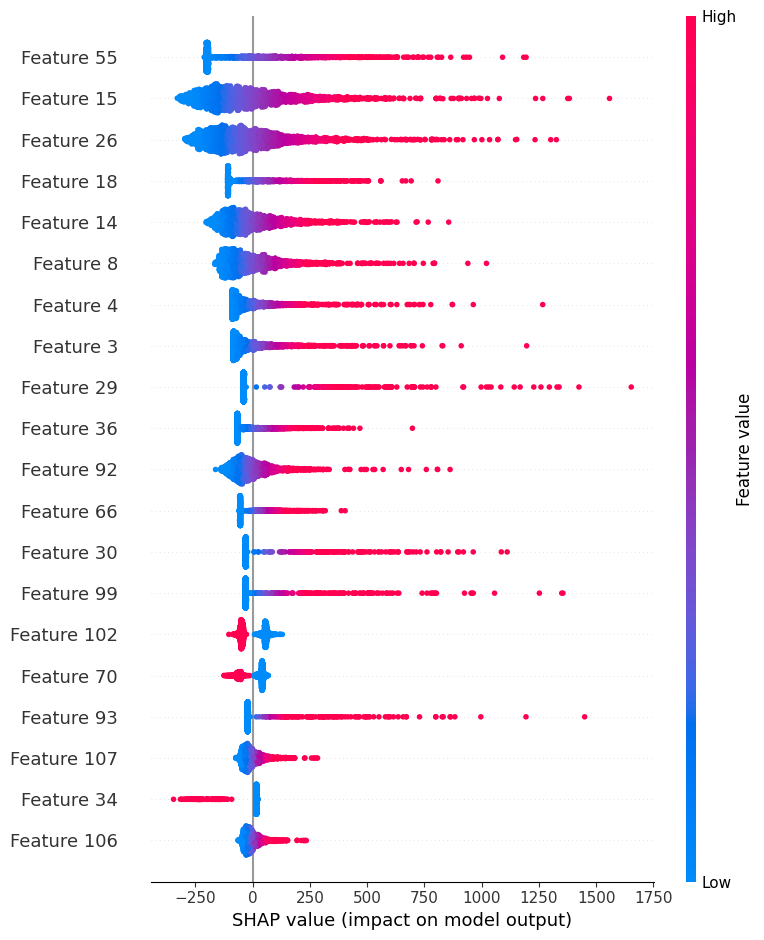

In [ ]:
# Визуализация глобальной важности признаков
shap.summary_plot(shap_values, X_test)

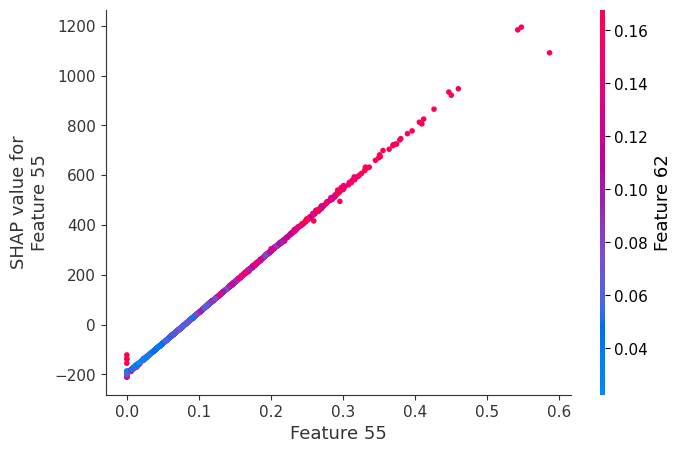

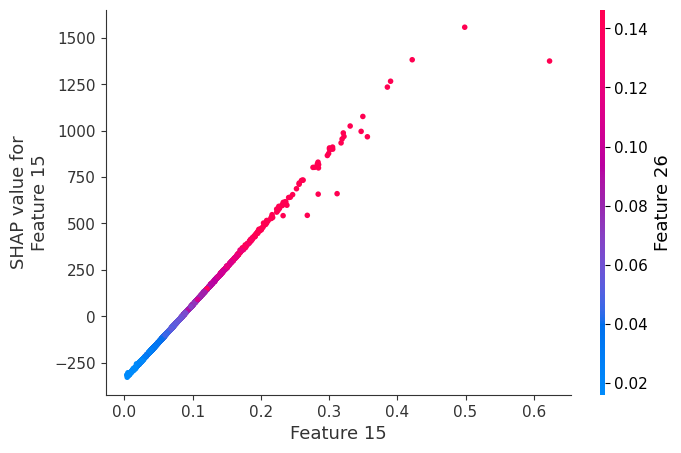

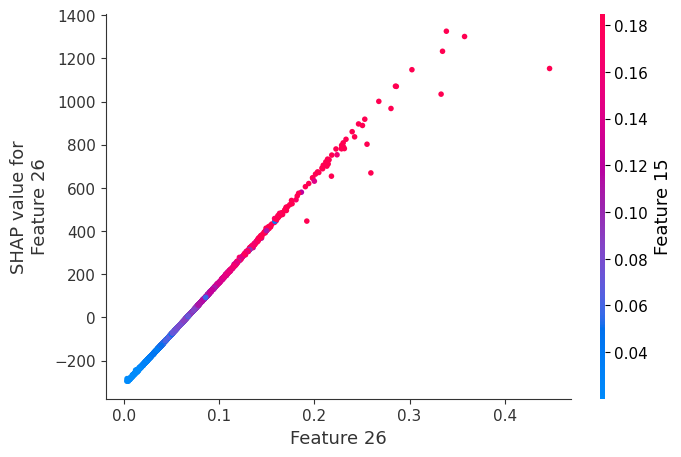

In [ ]:
# Визуализация частичной зависимости для 55-го признака
shap.dependence_plot(55, shap_values, X_test)

# Визуализация частичной зависимости для 15-го признака
shap.dependence_plot(15, shap_values, X_test)

# Визуализация частичной зависимости для 15-го признака
shap.dependence_plot(26, shap_values, X_test)

### Вторая модель. Градиентный бустинг

#### Обучение

In [ ]:
# Инициализация модели с параметрами по умолчанию
gbr = GradientBoostingRegressor(
    n_estimators=100,           # Количество деревьев в ансамбле
    learning_rate=0.1,          # Скорость обучения
    subsample=1.0,              # Доля данных для каждой итерации (1.0 - все данные)
    max_depth=3,                # Максимальная глубина каждого дерева
    min_samples_split=2,        # Минимальное количество образцов для разделения узла
    min_samples_leaf=1,         # Минимальное количество образцов в листе
    max_features=None,          # Количество признаков для разделения (None - все признаки)
    random_state=None,          # Случайное начальное состояние для воспроизводимости
    alpha=0.9                   # Параметр для функции потерь Huber
)

In [ ]:
# Обучение модели на обучающих данных
gbr.fit(X_train, y_train)

GradientBoostingRegressor()

In [ ]:
# Предсказания на валидационной выборке
y_valid_pred_gbr = gbr.predict(X_valid)

#### Метрики

In [ ]:
# Вычисляем RMSE
mse = mean_squared_error(y_valid, y_valid_pred_gbr)
rmse = np.sqrt(mse)

# Проверка на валидационной выборке
print("Gradient Boosting Regressor:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mean_absolute_error(y_valid, y_valid_pred_gbr):.4f}")
print(f"R2 Score: {r2_score(y_valid, y_valid_pred_gbr):.4f}")

Gradient Boosting Regressor:
RMSE: 127.5556
MAE: 79.5479
R2 Score: 0.9879


In [ ]:
# Финальная проверка на тестовой выборке
y_test_pred_gbr = gbr.predict(X_test)

# Вычисляем RMSE
mse = mean_squared_error(y_test, y_test_pred_gbr)
rmse = np.sqrt(mse)

mae = round(mean_absolute_error(y_test, y_test_pred_gbr), 3)
r2 = round(r2_score(y_test, y_test_pred_gbr), 5)
df_metrics_regress.loc[len(df_metrics_regress.index)] = ['Gradient Boosting', rmse, mae, r2]

In [ ]:
df_metrics_regress

,model,rmse,mae,r2
0,neural networks,95.455000,19.388,0.99185
1,Gradient Boosting,113.110899,77.119,0.98912


Модель Gradient Boosting Regressor показала высокую точность и стабильность на валидации и тесте. Низкий уровень ошибок и минимальная разница между метриками подтверждают хорошую обобщающую способность модели.

#### Важность признаков на основе IG

In [ ]:
# Примерный список названий признаков
feature_names = [f'Feature{i+1}' for i in range(X_train.shape[1])]  # Генерируем имена признаков

# Преобразуем X_train в DataFrame с правильным количеством столбцов
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Важность признаков для градиентного бустинга
feature_importances_gbr = gbr.feature_importances_
important_features_gbr = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': feature_importances_gbr
}).sort_values(by='Importance', ascending=False)

print(important_features_gbr)

      Feature  Importance
26  Feature27    0.487401
8    Feature9    0.131612
14  Feature15    0.130799
62  Feature63    0.123909
92  Feature93    0.040664
..        ...         ...
70  Feature71    0.000000
71  Feature72    0.000000
72  Feature73    0.000000
28  Feature29    0.000000
25  Feature26    0.000000

[112 rows x 2 columns]


**Feature27** имеет наибольшую важность (0.487), что указывает на его значительное влияние на предсказания модели.

**Feature15, Feature9 и Feature63** также оказывают заметное влияние с важностью 0.138, 0.126 и 0.124 соответственно, а признаки такие как **Feature19, Feature46, Feature82, Feature83 и Feature26** имеют нулевую важность, никак не влияющую на модель.

#### Шепли

In [ ]:
# Создание объяснителя на обучающих данных
explainer = shap.TreeExplainer(gbr)

In [ ]:
#Вычисление значения Шепли
shap_values = explainer.shap_values(X_test)

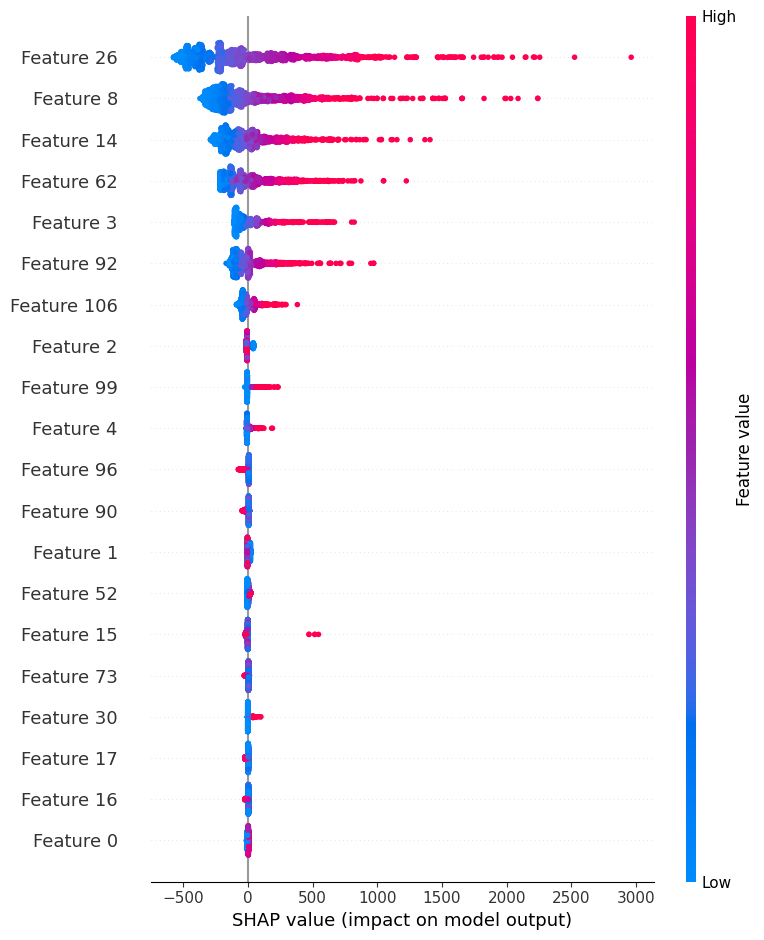

In [ ]:
# Визуализация глобальной важности признаков
shap.summary_plot(shap_values, X_test)

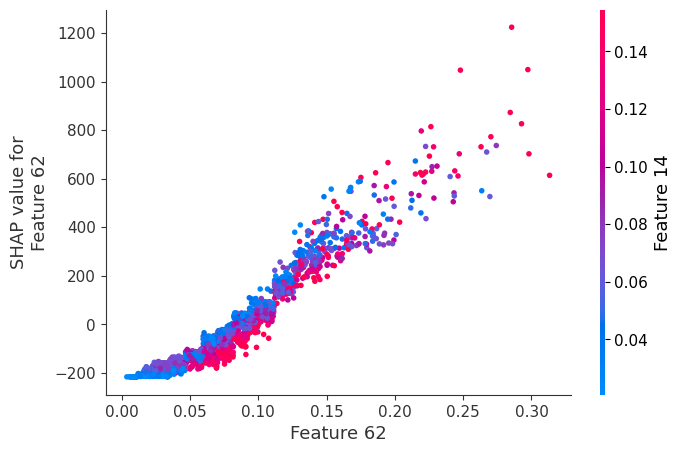

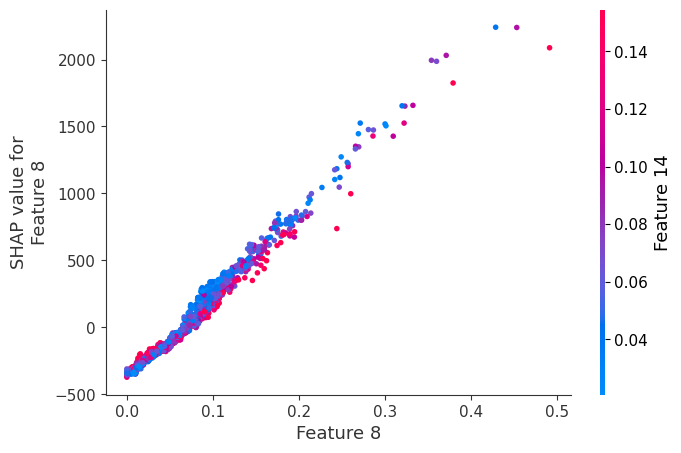

In [ ]:
# Визуализация частичной зависимости для 55-го признака
shap.dependence_plot(26, shap_values, X_test)

# Визуализация частичной зависимости для 15-го признака
shap.dependence_plot(8, shap_values, X_test)

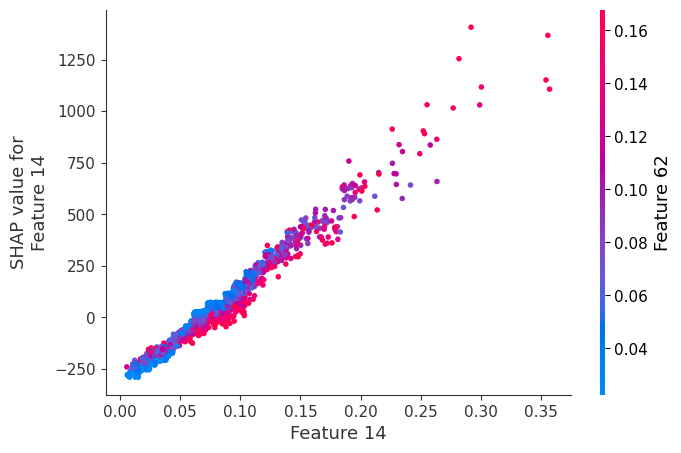

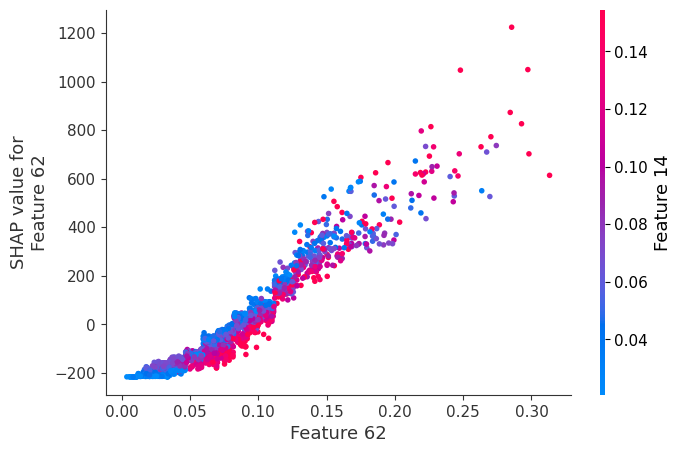

In [ ]:
# Визуализация частичной зависимости для 55-го признака
shap.dependence_plot(14, shap_values, X_test)

# Визуализация частичной зависимости для 15-го признака
shap.dependence_plot(62, shap_values, X_test)

In [ ]:
# Визуализация частичной зависимости для 55-го признака
shap.dependence_plot(26, shap_values, X_test)

# Визуализация частичной зависимости для 15-го признака
shap.dependence_plot(8, shap_values, X_test)

### Третья модель. Случайный лес

#### Обучение

In [ ]:
rf = RandomForestRegressor(
    n_estimators=100,       # Количество деревьев (по умолчанию 100)
    max_depth=None,         # Максимальная глубина деревьев (по умолчанию не ограничена)
    min_samples_split=2,    # Минимальное количество примеров для разделения узла (по умолчанию 2)
    min_samples_leaf=1,     # Минимальное количество примеров в листе (по умолчанию 1)
    max_features=None,    # Количество признаков для разделения узлов (по умолчанию 'auto', т.е. sqrt)
    random_state=77,        # Случайное состояние для воспроизводимости
    n_jobs=None,            # Количество ядер для параллельной обработки (по умолчанию None)
    verbose=0,              # Уровень детализации сообщений
    warm_start=False        # Флаг для повторного использования предыдущего обучения
)

In [ ]:
# Обучение модели на обучающих данных
rf.fit(X_train, y_train)

RandomForestRegressor(max_features=None, random_state=77)

In [ ]:
# Предсказания на валидационной выборке
y_valid_pred_rf = rf.predict(X_valid)

#### Метрики

In [ ]:
# Оценка качества модели на валидационной выборке

# Вычисляем RMSE
mse = mean_squared_error(y_valid, y_valid_pred_gbr)
rmse = np.sqrt(mse)

# Проверка на валидационной выборке
print("Random Forest Regressor:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mean_absolute_error(y_valid, y_valid_pred_rf):.4f}")
print(f"R2 Score: {r2_score(y_valid, y_valid_pred_rf):.4f}")

Random Forest Regressor:
RMSE: 127.5556
MAE: 72.8493
R2 Score: 0.9799


In [ ]:
# Финальная проверка на тестовой выборке
y_test_pred_rf = rf.predict(X_test)

# Вычисляем RMSE
mse = mean_squared_error(y_test, y_test_pred_rf)
rmse = np.sqrt(mse)

mae = round(mean_absolute_error(y_test, y_test_pred_rf), 3)
r2 = round(r2_score(y_test, y_test_pred_rf), 5)
df_metrics_regress.loc[len(df_metrics_regress.index)] = ['Random Forest', rmse, mae, r2]

In [ ]:
df_metrics_regress

,model,rmse,mae,r2
0,neural networks,95.455000,19.388,0.99185
1,Gradient Boosting,113.110899,77.119,0.98912
2,Random Forest,137.730830,70.110,0.98386


Модель Random Forest Regressor показала высокое качество на валидационной выборках. Небольшая разница между метриками указывает на хорошую обобщающую способность модели и отсутствие переобучения. Модель объясняет более 97% дисперсии данных, что подтверждает её высокую точность и стабильность.

#### Важность признаков на основе IG

In [ ]:
# Важность признаков для случайного леса
feature_importances_rf = rf.feature_importances_
important_features_rf = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': feature_importances_rf
}).sort_values(by='Importance', ascending=False)

print(important_features_rf)

      Feature    Importance
26  Feature27  6.456222e-01
8    Feature9  1.321323e-01
14  Feature15  4.778297e-02
15  Feature16  4.082175e-02
62  Feature63  2.384510e-02
..        ...           ...
46  Feature47  1.089683e-07
87  Feature88  6.166504e-08
54  Feature55  8.578800e-09
82  Feature83  1.896761e-10
12  Feature13  0.000000e+00

[112 rows x 2 columns]


**Feature27** имеет наибольшую важность (0.644), что указывает на его наибольшее влияние на предсказания модели.
**Feature83, Feature88, Feature55 и Feature13** имеют минимальное и вовсе отсутствующее влияние на модель.

#### Шепли

In [ ]:
explainer = shap.TreeExplainer(rf)

In [ ]:
shap_values = explainer.shap_values(X_test)

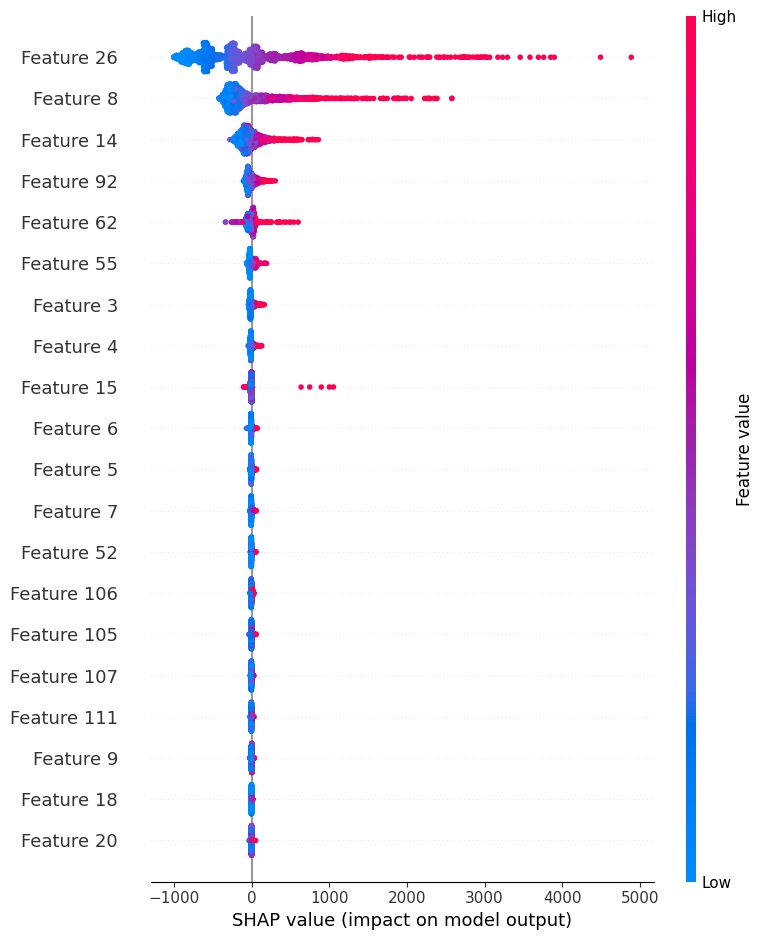

In [ ]:
shap.summary_plot(shap_values, X_test)

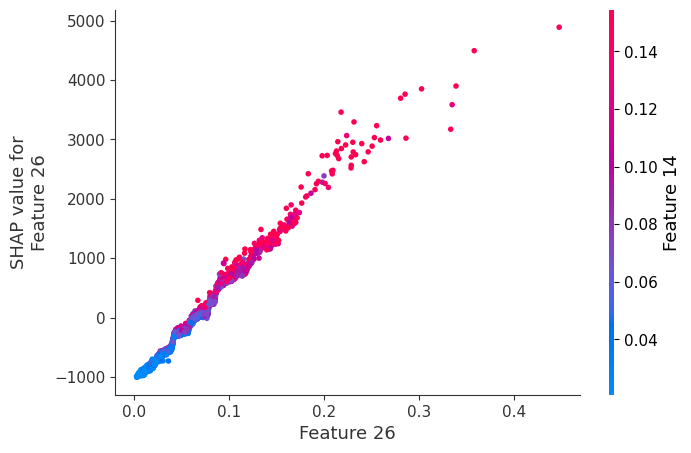

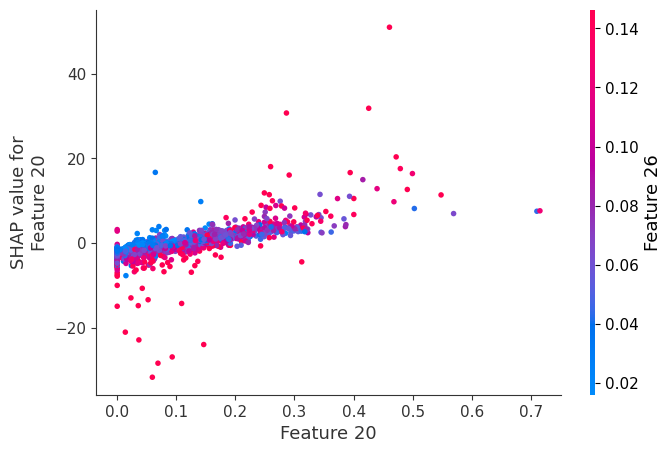

In [ ]:
#: Визуализация частичной зависимости для 26-го признака
shap.dependence_plot(26, shap_values, X_test)

#: Визуализация частичной зависимости для 26-го признака
shap.dependence_plot(20, shap_values, X_test)

## Задание №2. Бинарный классификатор

### Работа с данными

In [ ]:
from google.colab import drive

# Подключаем Google Диск
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Путь к файлу на Google Диске
file_path = '/content/drive/My Drive/ColabNotebooks/ML/Laba5/diabetes_012_health_indicators_BRFSS2015.csv'

# Чтение CSV файла
df = pd.read_csv(file_path, encoding="windows-1251")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [ ]:
df.shape

(253680, 22)

In [ ]:
#Пропусков нет
df.isnull().sum()/df.shape[0]

,0
Diabetes_012,0.0
HighBP,0.0
HighChol,0.0
CholCheck,0.0
BMI,0.0
Smoker,0.0
Stroke,0.0
HeartDiseaseorAttack,0.0
PhysActivity,0.0
Fruits,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [ ]:
df['Diabetes_012'] = df['Diabetes_012'].replace({2 : 1})

In [ ]:
df1 = df.drop_duplicates()

In [ ]:
df1.shape

(229712, 22)

Разделим датасет на три части: тренировочную (70%), тестовую (20%) и валидационную (10%).

In [ ]:
X_train2, X_rem2, y_train2, y_rem2 = train_test_split(df1.drop(['Diabetes_012'], axis=1), df1['Diabetes_012'],
                                                   train_size=0.7, random_state=77)

X_valid2, X_test2, y_valid2, y_test2 = train_test_split(X_rem2, y_rem2, test_size=0.66, random_state=77)

### Первая модель. Нейронные сети

#### Обучение

In [ ]:
binary_classifier_2 = Sequential(
    [
        layers.Dense(4, activation = 'relu', input_dim = X_train2.shape[1]),
        layers.Dense(4, activation = 'sigmoid'),
        layers.Dense(4, activation = 'relu'),
        layers.Dense(4, activation = 'sigmoid'),
        layers.Dense(2, activation = 'relu'),
        layers.Dense(1, activation = 'sigmoid')
    ]
)
binary_classifier_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 4)                   │              88 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 2)                   │              10 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
binary_classifier_2.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [ ]:
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 10, mode = 'max', verbose =1)
checkpoint = ModelCheckpoint('cancer2_weights-{epoch:02d}-{val_accuracy:.3f}.keras',
                             monitor = 'val_accuracy', verbose = 1, mode = 'max',
                             save_best_only = True)
callbacks_list = [early_stop,checkpoint]

In [ ]:
binary_class_history = binary_classifier_2.fit(X_train2, y_train2, batch_size = 10, validation_data = (X_valid2, y_valid2),
                                        callbacks = callbacks_list, epochs = 100)

Epoch 1/100
16073/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8354 - loss: 0.3690
Epoch 1: val_accuracy improved from 0.83743 to 0.83773, saving model to cancer2_weights-01-0.838.keras
16080/16080 ━━━━━━━━━━━━━━━━━━━━ 63s 4ms/step - accuracy: 0.8354 - loss: 0.3690 - val_accuracy: 0.8377 - val_loss: 0.3672
Epoch 2/100
16075/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8354 - loss: 0.3698
Epoch 2: val_accuracy did not improve from 0.83773
16080/16080 ━━━━━━━━━━━━━━━━━━━━ 35s 2ms/step - accuracy: 0.8354 - loss: 0.3698 - val_accuracy: 0.8364 - val_loss: 0.3695
Epoch 3/100
16066/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8356 - loss: 0.3696
Epoch 3: val_accuracy did not improve from 0.83773
16080/16080 ━━━━━━━━━━━━━━━━━━━━ 42s 2ms/step - accuracy: 0.8356 - loss: 0.3696 - val_accuracy: 0.8359 - val_loss: 0.3671
Epoch 4/100
16076/16080 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8344 - loss: 0.3724
Epoch 4: val_accuracy did not improve from 0.83773
16080/16080 ━━

#### Метрики

In [ ]:
probs2 = binary_classifier_2.predict(X_test2)[:,0]
truth2 = y_test2

1422/1422 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


In [ ]:
preds2 = (probs2>0.4).astype(int)
preds2

array([0, 1, 0, ..., 1, 0, 1])

In [ ]:
df_metrics = pd.DataFrame(columns=['model', 'recall', 'precision', 'weighted_accuracy', 'auc'])

recall = round(recall_score(truth2, preds2), 4)
precision = round(precision_score(truth2, preds2), 4)
weighted_accuracy = round(balanced_accuracy_score(truth2, preds2), 4)
auc = round(roc_auc_score(truth2, probs2), 4)

df_metrics.loc[len(df_metrics.index)] = ['neural networks', recall, precision, weighted_accuracy, auc]

In [ ]:
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,neural networks,0.4376,0.4629,0.6672,0.8036


#### Шепли

In [ ]:
import shap

# Создание объяснителя на обучающих данных
explainer2 = shap.Explainer(binary_classifier_2, X_train2)

In [ ]:
# Вычисление значений Шепли на тестовых данных
shap_values = explainer2(X_test2)

PermutationExplainer explainer: 45485it [1:38:04,  7.72it/s]


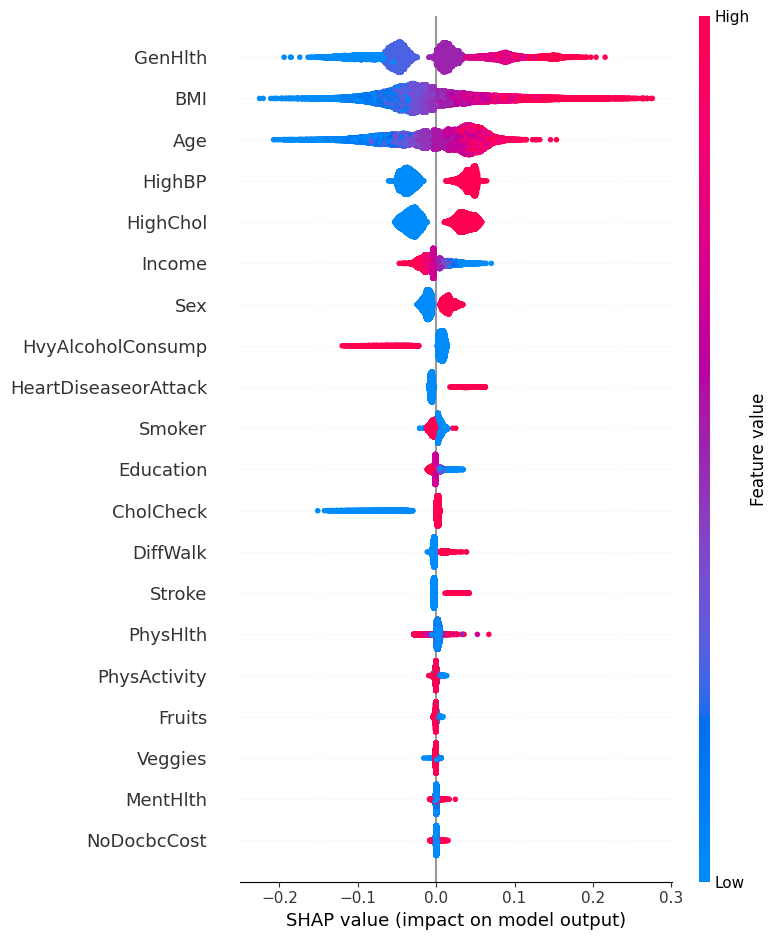

In [ ]:
# Построение графика summary plot
shap.summary_plot(shap_values, X_test2)

### Вторая модель. Градиентный бустинг

#### Обучение

In [ ]:
# Инициализация модели
gbr2 = GradientBoostingRegressor(random_state=77)  # Градиентный бустинг

In [ ]:
# Обучение модели на обучающих данных
gbr2.fit(X_train2, y_train2)

GradientBoostingRegressor(random_state=77)

In [ ]:
# Предсказания на валидационной выборке
y_valid_pred_gbr2 = gbr2.predict(X_valid2)

#### Метрики

In [ ]:
# Предсказания на тестовой выборке (для бинарного классификатора)
y_test_pred_proba = gbr2.predict(X_test2)  # Получаем вероятности
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)  # Преобразуем в классы, порог 0.5

In [ ]:
# Вычисляем метрики
recall = round(recall_score(y_test2, y_test_pred), 4)
precision = round(precision_score(y_test2, y_test_pred), 4)
weighted_accuracy = round(accuracy_score(y_test2, y_test_pred), 4)  # Используем accuracy как weighted_accuracy
auc = round(roc_auc_score(y_test2, y_test_pred_proba), 4)  # AUC на основе вероятностей

In [ ]:
# Добавляем результаты в DataFrame
df_metrics.loc[len(df_metrics.index)] = ['Gradient Boosting', recall, precision, weighted_accuracy, auc]

In [ ]:
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,neural networks,0.4376,0.4629,0.6672,0.8036
1,Gradient Boosting,0.1661,0.6014,0.8407,0.8042


#### Важность признаков на основе критерия IG

In [ ]:
# Примерный список названий признаков
feature_names = [f'Feature{i+1}' for i in range(X_train.shape[1])]  # Генерируем имена признаков

# Преобразуем X_train в DataFrame с правильным количеством столбцов
X_train_df = pd.DataFrame(X_train, columns=feature_names)

# Важность признаков для градиентного бустинга
feature_importances_gbr = gbr2.feature_importances_
important_features_gbr2 = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': feature_importances_gbr
}).sort_values(by='Importance', ascending=False)

print(important_features_gbr2)

      Feature  Importance
0    Feature1    0.275811
13  Feature14    0.265533
3    Feature4    0.182279
18  Feature19    0.091420
1    Feature2    0.085751
16  Feature17    0.031463
6    Feature7    0.025919
10  Feature11    0.010262
20  Feature21    0.010125
17  Feature18    0.005788
2    Feature3    0.005461
5    Feature6    0.002855
19  Feature20    0.002642
14  Feature15    0.001847
15  Feature16    0.001589
4    Feature5    0.000594
8    Feature9    0.000313
11  Feature12    0.000248
9   Feature10    0.000069
7    Feature8    0.000032
12  Feature13    0.000000


**Feature1 и Feature14** наиболее важные признаки, а **Feature8 и Feature13** имеют крайне малое влияние на модель.

#### Шепли

In [ ]:
# Создание объяснителя на обучающих данных
explainer2 = shap.Explainer(gbr2, X_train2)

In [ ]:
# Вычисление значений Шепли на тестовых данных
shap_values = explainer2(X_test2)

 99%|===================| 44967/45484 [01:15<00:00]       

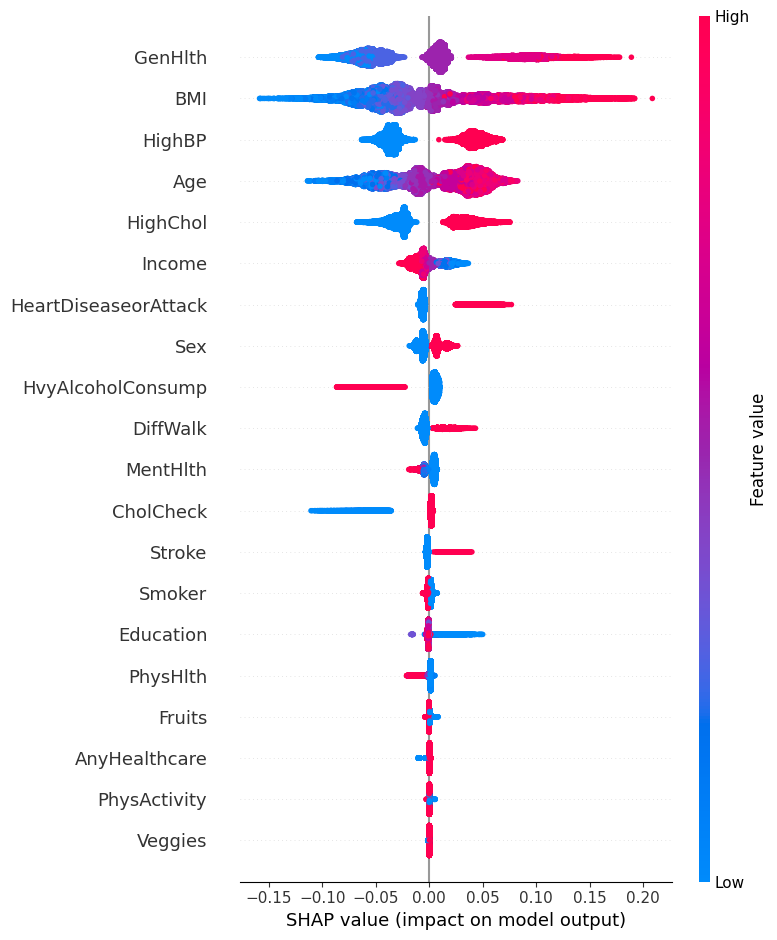

In [ ]:
# Построение графика summary plot
shap.summary_plot(shap_values, X_test2)

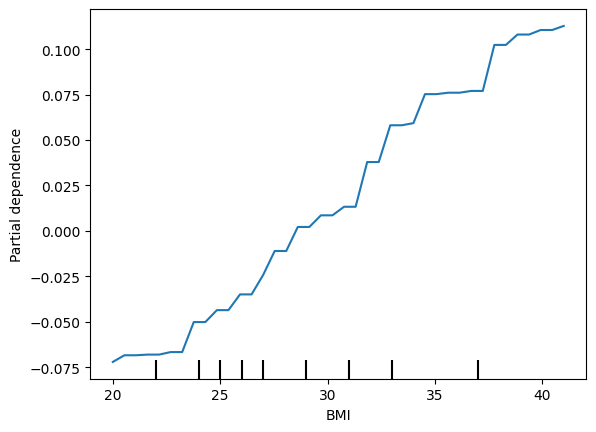

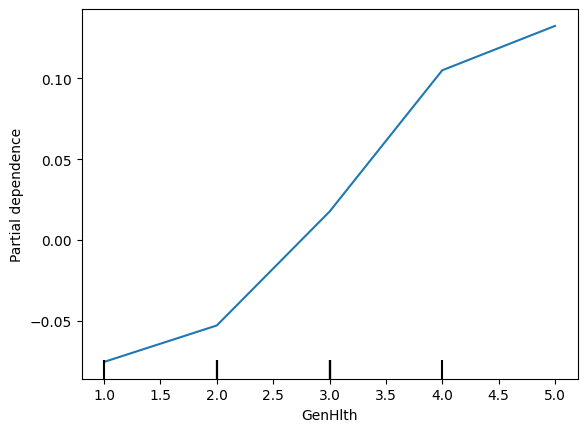

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Строим график частичной зависимости для признака 'BMI'
disp = PartialDependenceDisplay.from_estimator(gbr2, X_train2, features=['BMI'], grid_resolution=40)

# Строим график частичной зависимости для признака 'BMI'
disp = PartialDependenceDisplay.from_estimator(gbr2, X_train2, features=['GenHlth'], grid_resolution=70)

### Третья модель. Случайный лес

#### Обучение

In [ ]:
# Инициализация модели
rf2 = RandomForestRegressor(random_state=77)      # Случайный лес

In [ ]:
# Обучение модели на обучающих данных
rf2.fit(X_train2, y_train2)

RandomForestRegressor(random_state=77)

In [ ]:
# Предсказания на валидационной выборке
y_valid_pred_rf2 = rf2.predict(X_valid2)

#### Метрики

In [ ]:
# Предсказания на тестовой выборке (для бинарного классификатора)
y_test_pred_proba = rf2.predict(X_test2)  # Получаем вероятности
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)  # Преобразуем в классы, порог 0.5

In [ ]:
# Вычисляем метрики
recall = round(recall_score(y_test2, y_test_pred), 4)
precision = round(precision_score(y_test2, y_test_pred), 4)
weighted_accuracy = round(accuracy_score(y_test2, y_test_pred), 4)  # Используем accuracy как weighted_accuracy
auc = round(roc_auc_score(y_test2, y_test_pred_proba), 4)  # AUC на основе вероятностей

In [ ]:
# Добавляем результаты в DataFrame
df_metrics.loc[len(df_metrics.index)] = ['Random Forest', recall, precision, weighted_accuracy, auc]
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,neural networks,0.4376,0.4629,0.6672,0.8036
1,Gradient Boosting,0.1661,0.6014,0.8407,0.8042
2,Random Forest,0.2479,0.4368,0.8191,0.7554


#### Важность признаков на основе критерия IG

In [ ]:
# Важность признаков для градиентного бустинга
feature_importances_rf2 = rf2.feature_importances_
important_features_rf2 = pd.DataFrame({
    'Feature': X_train_df.columns,
    'Importance': feature_importances_rf2
}).sort_values(by='Importance', ascending=False)

print(important_features_rf2)

      Feature  Importance
3    Feature4    0.149006
20  Feature21    0.104981
18  Feature19    0.104298
15  Feature16    0.085551
19  Feature20    0.074846
0    Feature1    0.069013
14  Feature15    0.066833
13  Feature14    0.062922
4    Feature5    0.037154
8    Feature9    0.036737
7    Feature8    0.032520
17  Feature18    0.030515
9   Feature10    0.029001
16  Feature17    0.022499
1    Feature2    0.020954
6    Feature7    0.020408
12  Feature13    0.015766
5    Feature6    0.014447
11  Feature12    0.009450
10  Feature11    0.009068
2    Feature3    0.004031


#### Шепли

In [ ]:
import shap

#Создание объяснителя на обучающих данных
explainer2 = shap.Explainer(rf2, X_train2)

NameError: name 'rf2' is not defined

In [ ]:
# Вычисление значений Шепли на тестовых данных
shap_values = explainer2(X_test2)

Код выше вызывает неизавестную ошибку, после которой слетает всё, вплоть до бибилиотек, поэтому значение Шепли для данной модели вычислить не удается.

### Четвертая модель. Логистическая регрессия

In [ ]:
#Обучение модели (логистичесская регрессия)
lr_model = LogisticRegression(random_state=42, max_iter=1000)

In [ ]:
lr_model.fit(X_train2, y_train2)

LogisticRegression(max_iter=1000, random_state=42)

In [ ]:
lr_pred = lr_model.predict(X_test2)

#### Метрики

In [ ]:
# Предсказания вероятностей на тестовой выборке
y_test_pred_proba = lr_model.predict_proba(X_test2)[:, 1]  # Вероятности для положительного класса

In [ ]:
# Преобразуем вероятности в классы с порогом 0.5
y_test_pred = (y_test_pred_proba >= 0.5).astype(int)

In [ ]:
# Вычисляем метрики
recall = round(recall_score(y_test2, y_test_pred), 4)
precision = round(precision_score(y_test2, y_test_pred), 4)
weighted_accuracy = round(accuracy_score(y_test2, y_test_pred), 4)  # Используем accuracy как weighted_accuracy
auc = round(roc_auc_score(y_test2, y_test_pred_proba), 4)  # AUC на основе вероятностей

In [ ]:
# Добавляем результаты в DataFrame
df_metrics.loc[len(df_metrics.index)] = ['Logistic Regression', recall, precision, weighted_accuracy, auc]
df_metrics

,model,recall,precision,weighted_accuracy,auc
0,Logistic Regression,0.1839,0.5492,0.8368,0.7977


In [ ]:
# Создаем объект Explainer для модели
explainer = shap.Explainer(lr_model, X_train2)

In [ ]:
# Вычисляем значения Шепли для тестовой выборки
shap_values = explainer(X_test2)

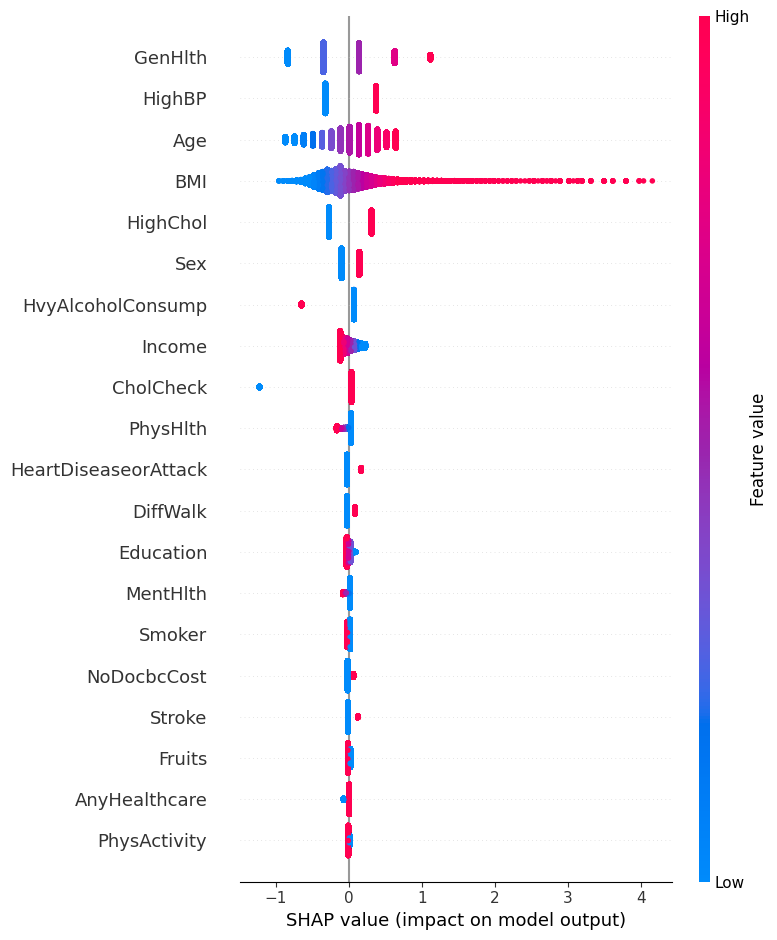

In [ ]:
# Строим summary plot для глобальной значимости признаков
shap.summary_plot(shap_values, X_test2)

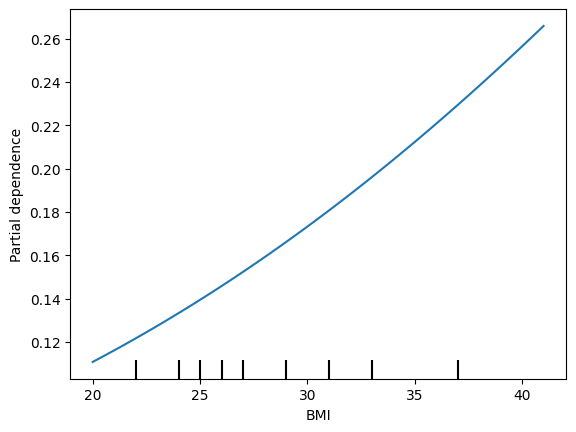

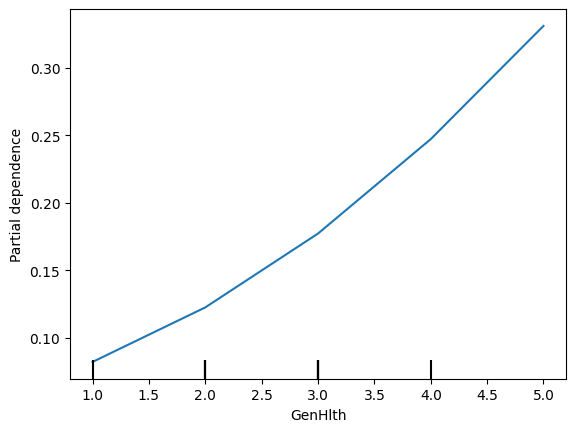

In [ ]:
from sklearn.inspection import PartialDependenceDisplay

# Строим график частичной зависимости для признака 'BMI'
disp = PartialDependenceDisplay.from_estimator(lr_model, X_train2, features=['BMI'], grid_resolution=70)

# Строим график частичной зависимости для признака 'BMI'
disp = PartialDependenceDisplay.from_estimator(lr_model, X_train2, features=['GenHlth'], grid_resolution=70)